In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
from sklearn.model_selection import cross_validate
train_df = pd.read_csv("cs-training.csv")
test_df = pd.read_csv("cs-test.csv")
combine=[train_df, test_df]
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

观察到：

"MonthlyIncome"和"NumberOfDependents"有空值

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [24]:
#decribe查看数值型数据的信息.没有非数值型的数据
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


观察到：

"NumberOfDependents" 有50%以上的人没有家属，离散值较大，选取众数填充null

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
Unnamed: 0                              0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64


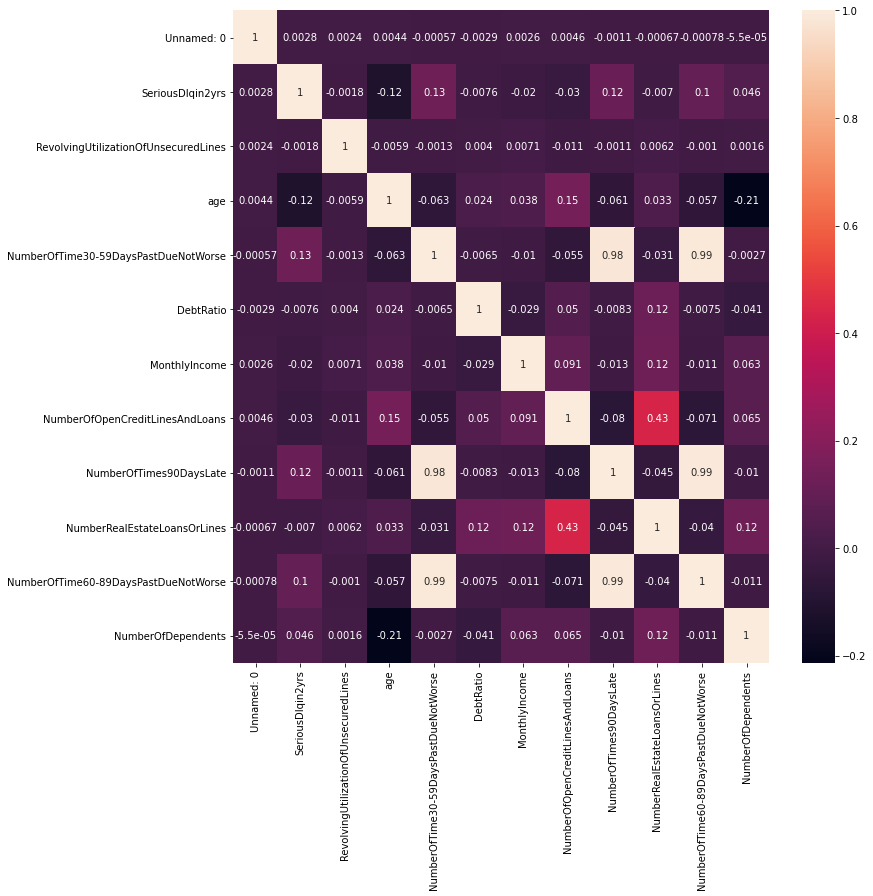

In [25]:
#查找关联 

corr_matrix = train_df.corr()
print(corr_matrix["SeriousDlqin2yrs"].sort_values(ascending=False))
# 下面的代码是图形化地展示各特征之间的相关性
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,annot=True)

查找SeriousDlqin2yrs（目标值，越小越好）与其它特征的相关性

其余特征，各特征相关性超过60%的就可以只用一个特征建模，此案例中，NumberOfTime30-59DaysPastDueNotWorse，NumberOfTimes90DaysLate，NumberOfTime60-89DaysPastDueNotWorse可以只用一个

数据清洗

In [26]:
for data in combine:
  data["MonthlyIncome"].fillna(data["MonthlyIncome"].mean(), inplace=True)
  data["NumberOfDependents"].fillna(data["MonthlyIncome"].mode()[0], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

异常值处理


NumberOfDependents

In [27]:
#可以看到，家属数量居然有6670的,而且数量还不少，占到了2.6%,先用平均值填补吧
train_df.NumberOfDependents.value_counts()

0.000000       86902
1.000000       26316
2.000000       19522
3.000000        9483
6670.221237     3924
4.000000        2862
5.000000         746
6.000000         158
7.000000          51
8.000000          24
9.000000           5
10.000000          5
13.000000          1
20.000000          1
Name: NumberOfDependents, dtype: int64

In [28]:
##填补前先看一下家属数和目标值的相关性，以便看一下效果,没处理前相关度-0.013881（我把所有的相关性列出来，是为了好随时查看其它几个的相关性）
corr_matrix = train_df.corr()
corr_matrix["SeriousDlqin2yrs"].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
Unnamed: 0                              0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
NumberOfDependents                     -0.013881
MonthlyIncome                          -0.018002
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

In [29]:
for data in combine:
  data["NumberOfDependents"][data["NumberOfDependents"]>30] = 0
  
corr_matrix = train_df.corr()
corr_matrix["SeriousDlqin2yrs"].sort_values(ascending=False)
#修改异常值后"NumberOfDependents"的相关性达到了0.046869

<ipython-input-29-7132033eec9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NumberOfDependents"][data["NumberOfDependents"]>30] = 0


SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046869
Unnamed: 0                              0.002801
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.018002
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

In [30]:
train_df = train_df[train_df["age"]>18]
test_df = test_df[test_df["age"]>18]

combine = [train_df, test_df]
train_df[train_df["age"]<18]
#确认没有18岁以下的客户

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


 创建新特征

In [31]:
for data in combine:
  data["CombinedDefaulted"] = data["NumberOfTimes90DaysLate"] + data["NumberOfTime60-89DaysPastDueNotWorse"] + data["NumberOfTime30-59DaysPastDueNotWorse"]
  data.loc[(data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1
  data["CombinedCreditLoans"] = data["NumberOfOpenCreditLinesAndLoans"] + data["NumberRealEstateLoansOrLines"]

  data["CombinedCreditLoans"] = data["NumberOfOpenCreditLinesAndLoans"] + data["NumberRealEstateLoansOrLines"]
  data.loc[(data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
  data.loc[(data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

In [32]:
train_df.corr()["SeriousDlqin2yrs"][["CombinedDefaulted", "CombinedCreditLoans"]]

CombinedDefaulted      0.314415
CombinedCreditLoans   -0.054778
Name: SeriousDlqin2yrs, dtype: float64

模型和预测
评价当前模型

In [33]:
attributes=["SeriousDlqin2yrs", 'age','NumberOfTime30-59DaysPastDueNotWorse','NumberOfDependents','MonthlyIncome',"CombinedDefaulted","CombinedCreditLoans"]
sol=['SeriousDlqin2yrs']

attributes2 = ["Unnamed: 0", 'age','NumberOfTime30-59DaysPastDueNotWorse','NumberOfDependents','MonthlyIncome',"CombinedDefaulted","CombinedCreditLoans"]
sol=['SeriousDlqin2yrs']

train_df = train_df[attributes]
test_df = test_df[attributes2]

逻辑回归
为了快速测试，写了一个类

In [34]:

class Tester():
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.cache = {} 

    def addDataset(self, name, df):
        self.datasets[name] = df.copy()

    def addModel(self, name, model):
        self.models[name] = model
        
    def clearModels(self):
        self.models = {}

    def clearCache(self):
        self.cache = {}
    
    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return self.cache[(m_name, df_name, sample_len, cv)]

        clf = self.models[m_name]
        
        if not sample_len: 
            sample = self.datasets[df_name]
        else: sample = self.datasets[df_name].sample(sample_len)
            
        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]

        s = cross_validate(clf, X, Y, scoring=['roc_auc'], cv=cv, n_jobs=-1)
        self.cache[(m_name, df_name, sample_len, cv)] = s

        return s

    def runTests(self, sample_len=80000, cv=4):
        # 在所有添加的数据集上测试添加的模型
        scores = {}
        for m_name in self.models:
            for df_name in self.datasets:
                # print('Testing %s' % str((m_name, df_name)), end='')
                start = time.time()

                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                scores[(m_name, df_name)] = score
                
                end = time.time()
                
                # print(' -- %0.2fs ' % (end - start))

        print('--- Top 10 Results ---')
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_roc_auc'].mean())[:10]:
            auc = score[1]['test_roc_auc']
            print("%s --> AUC: %0.4f (+/- %0.4f)" % (str(score[0]), auc.mean(), auc.std()))

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 我们将在所有模型中使用测试对象
tester = Tester('SeriousDlqin2yrs')

# 添加数据集
tester.addDataset('Drop Missing', train_df.dropna())

# 添加模型
rfc = RandomForestClassifier(n_estimators=15, max_depth = 6, random_state=0)
log = LogisticRegression()
tester.addModel('Simple Random Forest', rfc)
tester.addModel('Simple Logistic Regression', log)

# 测试
tester.runTests()

--- Top 10 Results ---
('Simple Random Forest', 'Drop Missing') --> AUC: 0.8131 (+/- 0.0060)
('Simple Logistic Regression', 'Drop Missing') --> AUC: 0.7972 (+/- 0.0045)


In [38]:
X_train = train_df.drop(['SeriousDlqin2yrs'], axis=1)
Y_train = train_df['SeriousDlqin2yrs']
X_test = test_df.drop(["Unnamed: 0"], axis=1)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict_proba(X_test)

In [39]:
submission = pd.DataFrame({
        "Id": test_df["Unnamed: 0"],
        "Probability": pd.DataFrame(Y_pred)[1]
    })

submission.to_csv('submission.csv', index=False)

最终结果：得分0.8131